In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset_path = "D:/perg/data/raw"

In [3]:
file_list = [f for f in os.listdir(dataset_path) if f.endswith('.xls') or f.endswith('.xlsx') or f.endswith('.csv')]
print(f"Total files found: {len(file_list)}")

Total files found: 337


In [4]:
print("Sample files:", file_list[:250])

Sample files: ['0001.csv', '0002.csv', '0003.csv', '0004.csv', '0005.csv', '0006.csv', '0007.csv', '0008.csv', '0009.csv', '0010.csv', '0011.csv', '0012.csv', '0013.csv', '0014.csv', '0015.csv', '0016.csv', '0017.csv', '0018.csv', '0019.csv', '0020.csv', '0021.csv', '0022.csv', '0023.csv', '0024.csv', '0025.csv', '0026.csv', '0027.csv', '0028.csv', '0029.csv', '0030.csv', '0031.csv', '0032.csv', '0033.csv', '0034.csv', '0035.csv', '0036.csv', '0037.csv', '0038.csv', '0039.csv', '0040.csv', '0041.csv', '0042.csv', '0043.csv', '0044.csv', '0045.csv', '0046.csv', '0047.csv', '0048.csv', '0049.csv', '0050.csv', '0051.csv', '0052.csv', '0053.csv', '0054.csv', '0055.csv', '0056.csv', '0057.csv', '0058.csv', '0059.csv', '0060.csv', '0061.csv', '0062.csv', '0063.csv', '0064.csv', '0065.csv', '0066.csv', '0067.csv', '0068.csv', '0069.csv', '0070.csv', '0071.csv', '0072.csv', '0073.csv', '0074.csv', '0075.csv', '0076.csv', '0077.csv', '0078.csv', '0079.csv', '0080.csv', '0081.csv', '0082.csv', '

In [5]:
sample_file = file_list[0]
sample_df = pd.read_csv(os.path.join(dataset_path, sample_file)) if sample_file.endswith('.csv') else pd.read_excel(os.path.join(dataset_path, sample_file))
print("Sample file content:")
print(sample_df.head())


Sample file content:
                     TIME_1  RE_1  LE_1
0  2016-09-15 09:40:21.0000   0.0   0.0
1  2016-09-15 09:40:21.0006  -0.1   0.1
2  2016-09-15 09:40:21.0012  -0.2   0.2
3  2016-09-15 09:40:21.0018  -0.2   0.4
4  2016-09-15 09:40:21.0024  -0.2   0.6


In [6]:
print("Statistical summary:")
print(sample_df.describe())

Statistical summary:
             RE_1        LE_1
count  255.000000  255.000000
mean    -1.406667    1.853333
std      2.954510    2.323497
min     -6.700000   -2.100000
25%     -3.250000    0.200000
50%     -1.600000    1.300000
75%      0.000000    3.200000
max      5.000000    7.400000


In [7]:
print("Missing values per column:")
print(sample_df.isnull().sum())

Missing values per column:
TIME_1    0
RE_1      0
LE_1      0
dtype: int64


In [8]:
dfs = []
for fname in file_list[:20]:
    fpath = os.path.join(dataset_path, fname)
    df = pd.read_csv(fpath) if fname.endswith('.csv') else pd.read_excel(fpath)
    dfs.append(df)
all_data = pd.concat(dfs, ignore_index=True)
print("Shape of concatenated subset:", all_data.shape)

Shape of concatenated subset: (5100, 9)


In [9]:
# Aggregate basic statistics over a subset of files (e.g. first 20)
stats_df = all_data[['RE_1', 'LE_1']].describe()
print("Aggregated statistics for RE_1 and LE_1 signals:")
print(stats_df)


Aggregated statistics for RE_1 and LE_1 signals:
              RE_1         LE_1
count  5100.000000  5100.000000
mean      0.007804    -0.166686
std       2.763640     2.526146
min      -6.800000    -7.400000
25%      -1.400000    -1.900000
50%      -0.200000     0.000000
75%       0.900000     1.300000
max      15.000000     7.800000


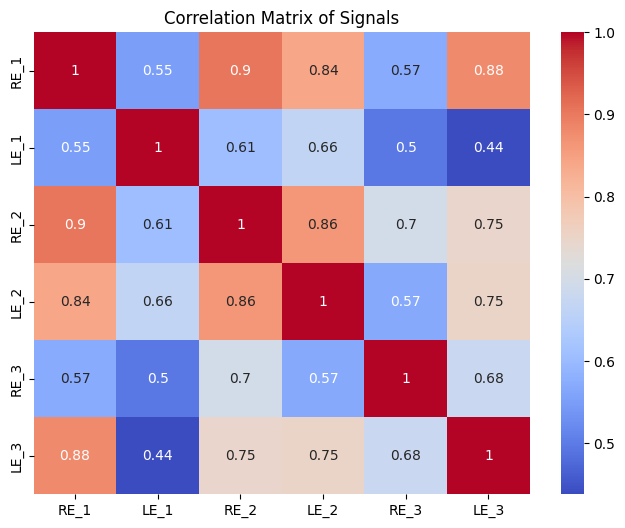

In [10]:
corr_matrix = all_data[['RE_1', 'LE_1', 'RE_2', 'LE_2','RE_3', 'LE_3']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Signals")
plt.show()


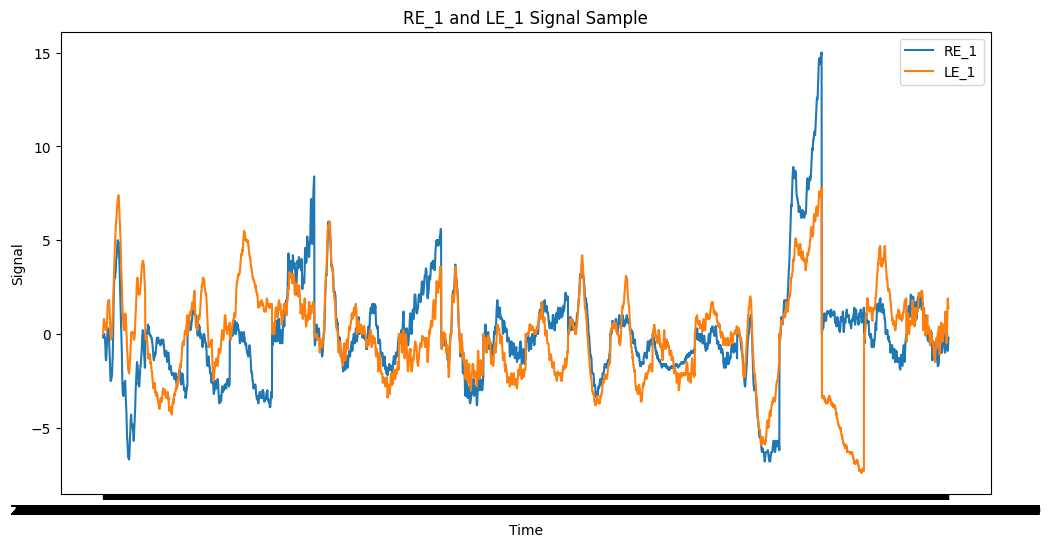

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(all_data['TIME_1'], all_data['RE_1'], label='RE_1')
plt.plot(all_data['TIME_1'], all_data['LE_1'], label='LE_1')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('RE_1 and LE_1 Signal Sample')
plt.legend()
plt.show()

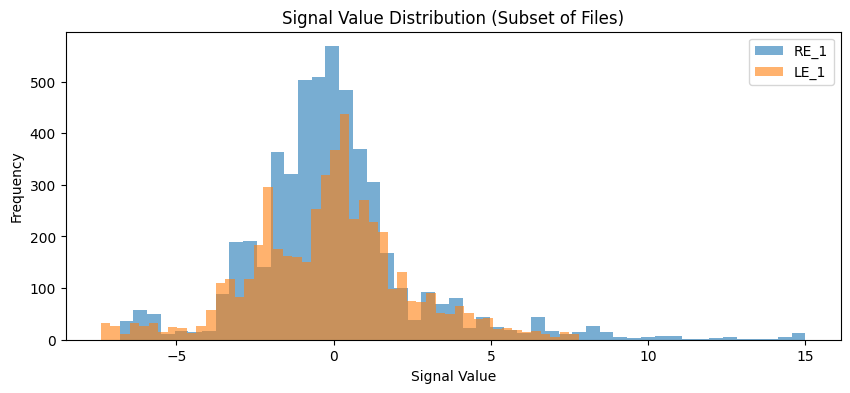

In [12]:
plt.figure(figsize=(10, 4))
plt.hist(all_data['RE_1'], bins=50, alpha=0.6, label='RE_1')
plt.hist(all_data['LE_1'], bins=50, alpha=0.6, label='LE_1')
plt.xlabel('Signal Value')
plt.ylabel('Frequency')
plt.title('Signal Value Distribution (Subset of Files)')
plt.legend()
plt.show()

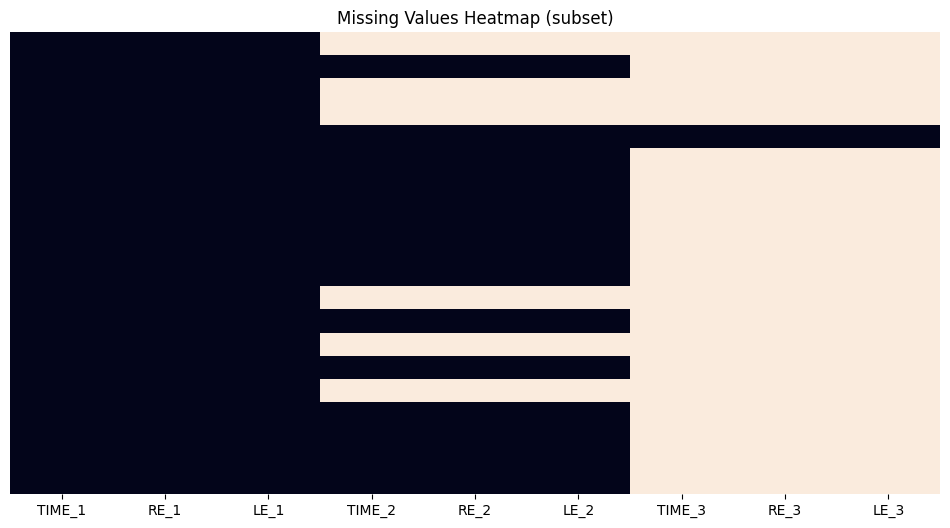

In [13]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(all_data.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap (subset)")
plt.show()


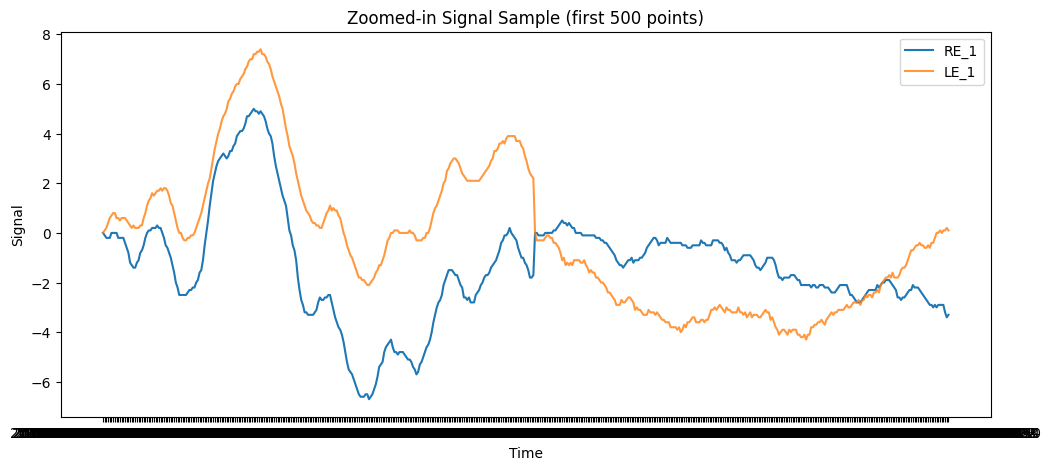

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(all_data['TIME_1'].iloc[:500], all_data['RE_1'].iloc[:500], label='RE_1')
plt.plot(all_data['TIME_1'].iloc[:500], all_data['LE_1'].iloc[:500], label='LE_1', alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Signal")
plt.title("Zoomed-in Signal Sample (first 500 points)")
plt.legend()
plt.show()


In [15]:
dataset_path = "D:/perg/data/raw"
file_list = [f for f in os.listdir(dataset_path) if f.endswith('.csv') or f.endswith('.xlsx')]

# Dictionary to accumulate total null counts per column across all files
total_null_counts = {}

for fname in file_list:
    fpath = os.path.join(dataset_path, fname)
    # Read the file based on extension
    df = pd.read_csv(fpath) if fname.endswith('.csv') else pd.read_excel(fpath)

    # Count nulls in each column for this file
    file_nulls = df.isnull().sum()

    # Aggregate counts to total_null_counts
    for col, null_count in file_nulls.items():
        if col in total_null_counts:
            total_null_counts[col] += null_count
        else:
            total_null_counts[col] = null_count

# Convert to a sorted pandas Series for better view
null_summary = pd.Series(total_null_counts).sort_values(ascending=False)

print("Total null values per column across all dataset files:")
print(null_summary)


Total null values per column across all dataset files:
unilateral      328
diagnosis3      323
rep_record      281
diagnosis2      246
comments        241
va_le_logMar     19
va_re_logMar     19
LE_5              0
diagnosis1        0
sex               0
age_years         0
date              0
id_record         0
TIME_1            0
RE_1              0
TIME_5            0
LE_4              0
RE_4              0
TIME_4            0
LE_3              0
RE_3              0
TIME_3            0
LE_2              0
RE_2              0
TIME_2            0
LE_1              0
RE_5              0
dtype: int64


In [16]:
metadata_path = 'D:/perg/data/raw/participants_info.csv'
metadata = pd.read_csv(metadata_path)
print('Metadata shape:', metadata.shape)
metadata.head()

Metadata shape: (336, 12)


,id_record,date,age_years,sex,diagnosis1,diagnosis2,diagnosis3,va_re_logMar,va_le_logMar,unilateral,rep_record,comments
0,1,2016-09-15,13,Male,Normal,NaN,NaN,-0.08,0.06,NaN,NaN,NaN
1,2,2005-09-15,13,Female,Congenital stationary night blindness,NaN,NaN,0.18,0.16,NaN,NaN,NaN
2,3,2019-08-08,49,Female,Orbital ischemia,Systemic disorder with ocular manifestations,NaN,0.26,0.00,NaN,Id:0329 - Id:0154 - Id:0049 - Id:0271,NaN
3,4,2004-12-16,43,Female,Retinitis pigmentosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016-07-13,47,Female,Normal,NaN,NaN,0.10,0.10,NaN,NaN,NaN


In [17]:
print('Columns:', metadata.columns)
print('Missing values per column:')
print(metadata.isnull().sum())
print('\nDiagnosis class counts:')
print(metadata[['diagnosis1', 'diagnosis2', 'diagnosis3']].apply(pd.Series.value_counts).fillna(0))


Columns: Index(['id_record', 'date', 'age_years', 'sex', 'diagnosis1', 'diagnosis2',
       'diagnosis3', 'va_re_logMar', 'va_le_logMar', 'unilateral',
       'rep_record', 'comments'],
      dtype='object')
Missing values per column:
id_record         0
date              0
age_years         0
sex               0
diagnosis1        0
diagnosis2      246
diagnosis3      323
va_re_logMar     19
va_le_logMar     19
unilateral      328
rep_record      281
comments        241
dtype: int64

Diagnosis class counts:
                                                    diagnosis1  diagnosis2  \
14q32 deletion: Systemic disorder with ocular m...         0.0         1.0   
Acute macular neuroretinopathy                             1.0         0.0   
Affectation of the chiasm                                  1.0         0.0   
Age related choroidal atrophy                              1.0         0.0   
Albinism                                                   3.0         0.0   
...                

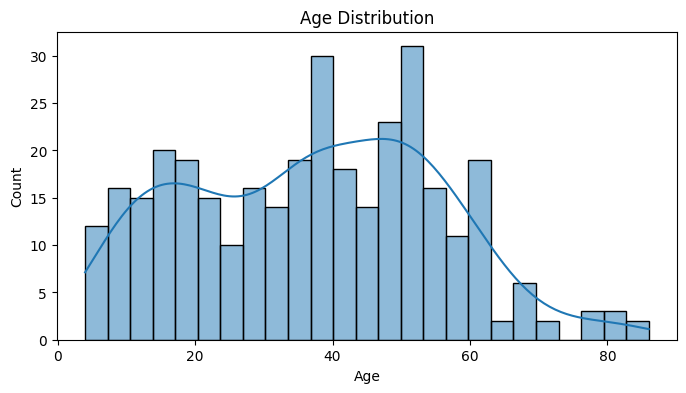

In [18]:

# Cell 4: Demographic distribution
import seaborn as sns 
plt.figure(figsize=(8,4))
sns.histplot(metadata['age_years'], bins=25, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

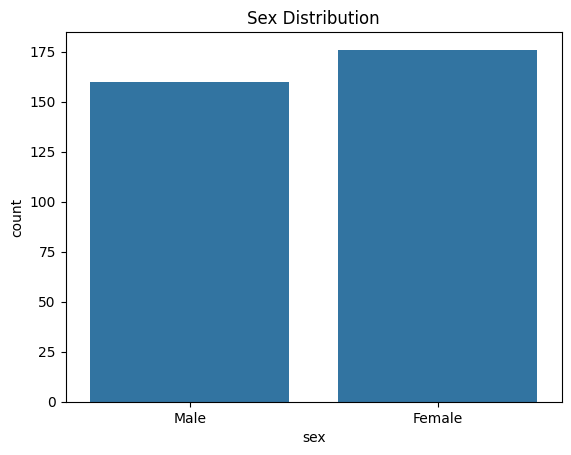

In [19]:
sns.countplot(x='sex', data=metadata)
plt.title('Sex Distribution')
plt.show()

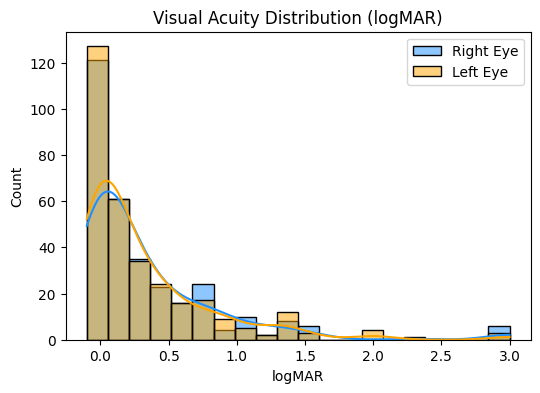

In [20]:

# Visual acuity distribution
plt.figure(figsize=(6,4))
sns.histplot(metadata['va_re_logMar'], bins=20, kde=True, color='dodgerblue', label='Right Eye')
sns.histplot(metadata['va_le_logMar'], bins=20, kde=True, color='orange', label='Left Eye')
plt.legend()
plt.title('Visual Acuity Distribution (logMAR)')
plt.xlabel('logMAR')
plt.ylabel('Count')
plt.show()

Index(['TIME_1', 'RE_1', 'LE_1'], dtype='object')


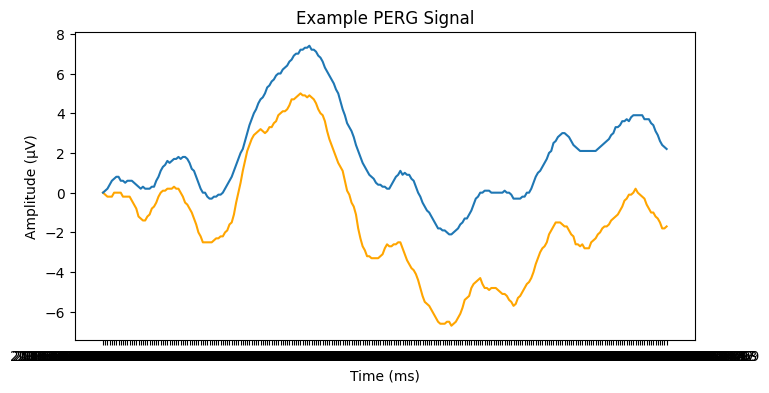

In [21]:
signal_file_example = 'D:/perg/data/raw/0001.csv'  # Use a real filename
df_signal = pd.read_csv(signal_file_example)
print(df_signal.columns)
# Plot right eye first signal
plt.figure(figsize=(8,4))
plt.plot(df_signal['TIME_1'], df_signal['RE_1'],color='orange')
plt.plot(df_signal['TIME_1'], df_signal['LE_1'])



plt.title('Example PERG Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (μV)')
plt.show()


In [22]:
print('Signal length:', len(df_signal))
print('Signal stats (RE_1):')
print(df_signal['RE_1'].describe())

Signal length: 255
Signal stats (RE_1):
count    255.000000
mean      -1.406667
std        2.954510
min       -6.700000
25%       -3.250000
50%       -1.600000
75%        0.000000
max        5.000000
Name: RE_1, dtype: float64
